In [ ]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

# Set up Chrome options
chrome_options = Options()

In [ ]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)


In [ ]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [ ]:
driver.find_elements(By.XPATH,'//div[text()="ACCEPT"]')

In [9]:
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [10]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [11]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [12]:
driver.get(book_categories[0].get_attribute('href'))

In [13]:
character_elems = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [14]:
character_elems[0].text

'Adalia'

In [15]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

time.sleep(3)
driver.find_elements(By.XPATH,'//div[text()="ACCEPT"]')
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name':book_name,"url": book_url})

In [16]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [17]:
character_list = []

for book in books:
    driver.get(book['url'])

    # Locate the elements by class name using the updated syntax
    character_elems = driver.find_elements(By.CLASS_NAME, "category-page__member-link")

    # Loop through the found elements and append their text to the list
    for elem in character_elems:
        character_list.append({
            'book': book['book_name'],
            'character': elem.text
        })

In [18]:
character_list

[{'book': 'Category:Baptism of Fire characters', 'character': 'Adalia'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Adela'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aen Saevherne'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aevenien'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Aglaïs'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Albrich'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Amavet'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Angus Bri Cri'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anna Kameny'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Anzelm Aubry'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Artaud Terranova'},
 {'book': 'Category:Baptism of Fire characters', 'character': 'Asse'},
 {'book': 'Category:Baptism of Fire characters',
  'character': 'Assire var Anahid'},
 

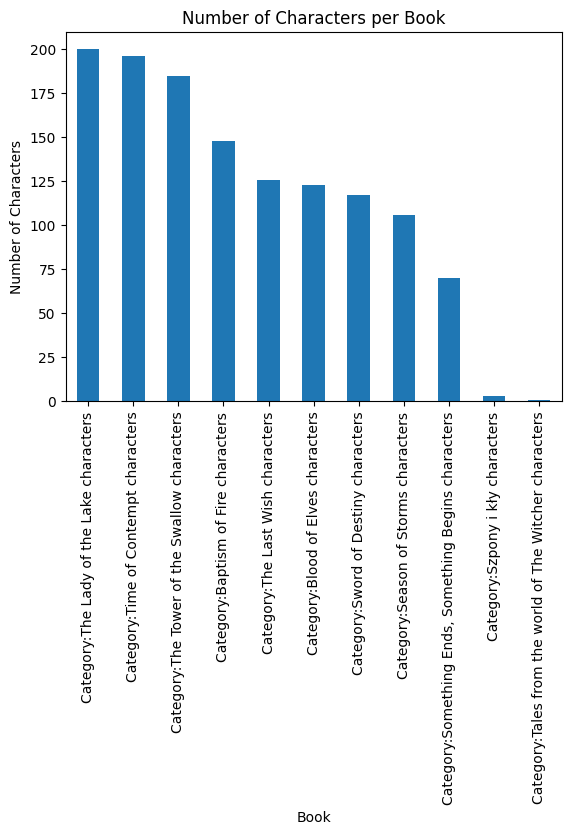

In [19]:

import matplotlib.pyplot as plt


# Convert character_list to a DataFrame
character_df = pd.DataFrame(character_list)

# Plot the value counts of characters by book
character_df['book'].value_counts().plot(kind="bar")

# Add labels and title for clarity
plt.xlabel('Book')
plt.ylabel('Number of Characters')
plt.title('Number of Characters per Book')

# Display the bar chart
plt.show()